### 1. 서론

숫자 손글씨 인식은 기계 학습 및 딥러닝 분야에서 중요한 문제 중 하나입니다.  
특히, 이러한 인식 기술은 우편번호 분류, 자동차 번호판 인식, 자동 서명 인증 등 다양한 응용 분야에서 활용됩니다.  
본 레포트에서는 손으로 쓴 숫자 이미지를 딥러닝 모델을 사용하여 인식하는 방법을 소개합니다.  
이를 위해 MNIST(Mixed National Institute of Standards and Technology) 데이터셋을 사용했습니다.

x_train.shape=(60000, 28, 28)
y_train.shape=(60000,)
x_test.shape=(10000, 28, 28)
y_test.shape=(10000,)


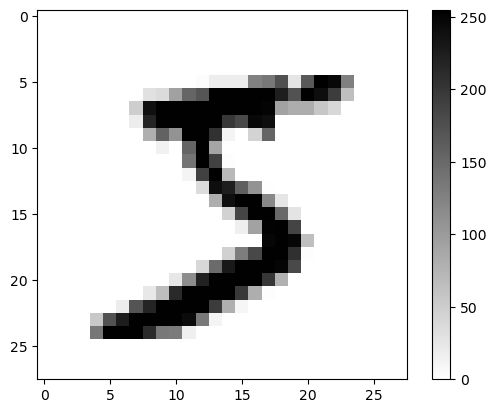

In [61]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data() 
print(f'x_train.shape={x_train.shape}') 
print(f'y_train.shape={y_train.shape}') 
print(f'x_test.shape={x_test.shape}') 
print(f'y_test.shape={y_test.shape}') 



plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

### 2. 모델 설계 및 학습

인공 신경망(MLP, Multi-Layer Perceptron)과 Convolutional Neural Network (CNN) 모델을 설계하여 숫자 이미지를 인식합니다.  
데이터를 학습 세트와 검증 세트로 나누고, 모델을 컴파일하여 손실 함수와 최적화 알고리즘을 설정합니다.  
모델을 학습하고 정확도를 평가합니다.  
CNN 모델의 정확도가 더 높아 앞으로 이 모델을 사용합니다.  
이 모델은 입력층, 합성곱층, 풀링층, 완전 연결층, 출력층으로 구성되어 있습니다.  

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2985 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1437 - accuracy: 0.9581
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1079 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0889 - accuracy: 0.9732
Epoch 5/5
313/313 [==============================] - 0s 996us/step - loss: 0.0738 - accuracy: 0.9761


[0.07380565255880356, 0.9761000275611877]

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
# 데이터 로드 및 전처리
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train[..., tf.newaxis]/255.0, x_test[..., tf.newaxis]/255.0

# CNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.23),
    layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 모델 평가
model.evaluate(x_test, y_test)


Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1487 - accuracy: 0.9542 - val_loss: 0.0445 - val_accuracy: 0.9842
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0524 - accuracy: 0.9842 - val_loss: 0.0329 - val_accuracy: 0.9883
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 0.0292 - val_accuracy: 0.9914
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0279 - accuracy: 0.9917 - val_loss: 0.0297 - val_accuracy: 0.9902
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0273 - accuracy: 0.9908


[0.02733074128627777, 0.9908000230789185]

In [5]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

313/313 [==============================] - 1s 2ms/step


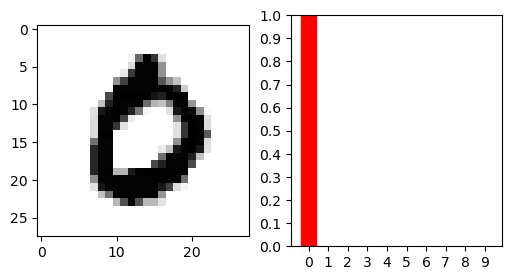

In [18]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(x_test)

plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.imshow(x_test[3], cmap=plt.cm.binary)

plt.subplot(1,2,2)
plt.xticks(range(10))
plt.yticks(np.arange(0, 1.1, 0.1))
thisplot = plt.bar(range(10), predictions[3], color="#777777")
plt.ylim([0, 1])

predicted_label = np.argmax(predictions[3])
thisplot[predicted_label].set_color('red')

plt.show()

### 3. 예측 프로그램 작성

학습된 모델을 사용하여 프로그램을 작성했습니다.  
Canvas에 숫자를 손글씨로 쓰면 이미지를 학습된 모델을 통해 예측한 결과를 나타냅니다.  
가장 높은 확률을 갖는 클래스의 인덱스를 가져와 예측 결과를 출력합니다.

In [35]:
from PIL import ImageGrab, ImageTk, Image
import tkinter as tk
import io
import numpy as np

def draw(event):
    x, y = event.x, event.y
    draw_area.create_oval(x, y, x+20, y+20, fill="black") # 붓 크기, 색

def convert_to_array():
    # 캔버스 이미지를 스크린샷으로 찍기
    screenshot = ImageGrab.grab(bbox=(draw_area.winfo_rootx(), draw_area.winfo_rooty(), 
                                     draw_area.winfo_rootx() + draw_area.winfo_width(), 
                                     draw_area.winfo_rooty() + draw_area.winfo_height()))
    # 이미지 크기를 28x28로 조정
    screenshot = screenshot.resize((28, 28), Image.LANCZOS)
    # 이미지를 흑백으로 변환하여 배열로 변환
    image_array = np.array(screenshot.convert('L'))
    # 이미지 반전
    image_array = 255 - image_array
    return image_array

def predict_digit():
    image_array = convert_to_array()
    normalized_image = image_array / 255.0
    
    # 이미지를 Tkinter 창에 표시
    img = Image.fromarray(image_array.astype(np.uint8))
    img = img.resize((image_array.shape[1]*10, image_array.shape[0]*10))
    img = ImageTk.PhotoImage(img)
    image_label.img = img
    image_label.config(image=img)
    
    # CNN 모델에서 예측을 위해 4차원 배열로 변경 (배치 크기 1 추가)
    input_image = np.expand_dims(normalized_image, axis=(0, -1))

    # 모델을 사용하여 예측
    prediction = model.predict(input_image)
    
    # 가장 높은 확률을 갖는 클래스의 인덱스 가져오기
    predicted_class_index = np.argmax(prediction)

    # 예측 결과 출력
    text_label.config(text=f"Predicted class: {predicted_class_index}")
    
    
def clear():
    draw_area.delete("all")


root = tk.Tk()
root.title("Handwritten Digit Recognition")

canvas_width = 280
canvas_height = 280

draw_area = tk.Canvas(root, width=canvas_width, height=canvas_height, bg="white")
draw_area.grid(row=0, column=0, padx=10, pady=10, columnspan=2)

draw_area.bind("<B1-Motion>", draw)

image_label = tk.Label(root, image=None)
image_label.grid(row=0, column=2, padx=10, pady=10)

text_label = tk.Label(root, text="")
text_label.grid(row=1, column=2, padx=10, pady=10)

predict_button = tk.Button(root, text="Predict Digit", command=predict_digit)
predict_button.grid(row=1, column=0, padx=10, pady=10, sticky="e")

clear_button = tk.Button(root, text="Clear", command=clear)
clear_button.grid(row=1, column=1, padx=10, pady=10, sticky="w")

root.mainloop()


1/1 [==============================] - 0s 16ms/step


![숫자손글씨](숫자손글씨.png)

In [45]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def predict_digit():
    image_array = convert_to_array()
    normalized_image = image_array / 255.0
    
    # CNN 모델에서 예측을 위해 4차원 배열로 변경 (배치 크기 1 추가)
    input_image = np.expand_dims(normalized_image, axis=(0, -1))

    # 모델을 사용하여 예측
    prediction = model.predict(input_image)
    
    # 가장 높은 확률을 갖는 클래스의 인덱스 가져오기
    predicted_class_index = np.argmax(prediction)

    # 예측 결과 출력
    text_label.config(text=f"Predicted class: {predicted_class_index}")
    
    # 예측 시각화
    plt.clf()  # 현재 그래프 지우기
    
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))

    axs[0].imshow(image_array, cmap=plt.cm.binary)
    axs[0].set_title('Input Image')

    axs[1].bar(range(10), prediction[0], color="#777777")
    axs[1].set_xticks(range(10))
    axs[1].set_yticks(np.arange(0, 1.1, 0.1))
    axs[1].set_ylim([0, 1])
    axs[1].set_title('Prediction')

    axs[1].bar(predicted_class_index, prediction[0, predicted_class_index], color='red')

    # Matplotlib 그래프를 Tkinter 창에 표시
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.grid(row=0, column=2, padx=10, pady=10)

    # 그래프 업데이트
    canvas.draw()

def draw(event):
    x, y = event.x, event.y
    draw_area.create_oval(x, y, x+20, y+20, fill="black") # 붓 크기, 색
    
def convert_to_array():
    # 캔버스 이미지를 스크린샷으로 찍기
    screenshot = ImageGrab.grab(bbox=(draw_area.winfo_rootx(), draw_area.winfo_rooty(), 
                                     draw_area.winfo_rootx() + draw_area.winfo_width(), 
                                     draw_area.winfo_rooty() + draw_area.winfo_height()))
    # 이미지 크기를 28x28로 조정
    screenshot = screenshot.resize((28, 28), Image.LANCZOS)
    # 이미지를 흑백으로 변환하여 배열로 변환
    image_array = np.array(screenshot.convert('L'))
    # 이미지 반전
    image_array = 255 - image_array
    return image_array
    
def clear():
    draw_area.delete("all")
    
def close_window():
    plt.close()  # Matplotlib 창 닫기
    if root:
        root.destroy()  # GUI 창 닫기

    
root = tk.Tk()
root.title("Handwritten Digit Recognition")

canvas_width = 280
canvas_height = 280

draw_area = tk.Canvas(root, width=canvas_width, height=canvas_height, bg="white")
draw_area.grid(row=0, column=0, padx=10, pady=10, columnspan=2)

draw_area.bind("<B1-Motion>", draw)

text_label = tk.Label(root, text="")
text_label.grid(row=1, column=2, padx=10, pady=10)

predict_button = tk.Button(root, text="Predict Digit", command=predict_digit)
predict_button.grid(row=1, column=0, padx=10, pady=10, sticky="e")

clear_button = tk.Button(root, text="Clear", command=clear)
clear_button.grid(row=1, column=1, padx=10, pady=10, sticky="w")

# GUI 창이 닫힐 때 호출될 함수 지정
root.protocol("WM_DELETE_WINDOW", close_window)

root.mainloop()


1/1 [==============================] - 0s 14ms/step


<Figure size 640x480 with 0 Axes>

![손글씨그래프](손글씨그래프.png)

### 5. 결과 및 결론

학습된 모델의 성능을 평가한 결과, 약 99%의 정확도를 달성했습니다.  
이는 MNIST 데이터셋에 대해 우수한 성능을 나타냅니다.  
레포트에서 사용한 모델은 숫자 손글씨 인식 분야에서 효과적으로 활용될 수 있으며, 미래에는 더 큰 데이터셋과 더 복잡한 모델을 사용하여 성능을 향상시킬 수 있습니다.